# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
data = pd.read_csv('./datasets/real_estate_data.csv',sep='\t')
print('Общая информация:')
data.info()
print()
print('Пример данных:')
print(data.sample(15))
print()
print('Describe:')
data.describe()

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  a

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Изучив общую информацию можно увидеть в датафрэйме 23699 записей и 22 столбца.

Cтолбцы содержащие пропуски:
- ceiling_height, 
- floors_total, 
- living_area, 
- is_apartment, 
- kitchen_area, 
- balcony, 
- locality_name, 
- airports_nearest, 
- cityCenters_nearest, 
- parks_around3000
- parks_nearest
- ponds_around3000
- days_exposition

Взяв пример данных, мы видим что некоторые данные, имеют неправильный тип, например first_day_exposition, записанный строкой или floors_total имеющий дробный тип float.

А так же можно сразу увидеть аномальные значения с помощью .describe():
- min 0 комнат, max 19 комнат
- общая площадь max 900 кв.м.
- высота потолков max 100 м
- жилая площадь min 2 кв.м.

### Шаг 2. Предобработка данных

#### Обработка пустых значений столбца is_apartament

In [3]:
print(data['is_apartment'].value_counts())
print(data['is_apartment'].isnull().sum())
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].isnull().sum())
data.info()

False    2725
True       50
Name: is_apartment, dtype: int64
20924
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  l

Пустые значения заполнены значением False, вероятнее в источнике данных пропуск подразумевал именно False. После заменны пустых значений столбец сменил свой тип на bool.

#### Обработка пустых значений столбца balcony

In [4]:
print(data['balcony'].value_counts())
print(data['balcony'].isnull().sum())
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isnull().sum())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64
11519
0


Пустые значения были заполнены значением 0, вероятнее в источнике данных пропуск подразумевал отсутствие балкона.

#### Вычисление доли жилой площади и заполнение путых значений в поле living_area

In [5]:
data['total_area'] = data['total_area'].round()
data['living_area'] = data['living_area'].round()

print(data['living_area'].describe())
print(data['living_area'].isnull().sum())

data['living_area_part'] = data['living_area'] / data['total_area']

living_area_part_median = data['living_area_part'].median()
data['living_area_part'] = data['living_area_part'].fillna(living_area_part_median) 


def fill_living_area(row):
    if np.isnan(row['living_area']):
        total_area = row['total_area']
        living_area_part = row['living_area_part']
        return round(total_area * living_area_part, 0)
    return row['living_area']
        

data['living_area'] = data.apply(fill_living_area, axis=1)
print(data['living_area'].isnull().sum())

count    21796.000000
mean        34.457745
std         22.033179
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        410.000000
Name: living_area, dtype: float64
1903
0


Сначала была вычислена доля жилой площади для всех записей в DataFrame (living_area_part), далее пропуски в living_area были заполнены медианным значением и после мы вычислили количество жилой площади(living_area) и заполнили пропущенные значения.



#### Вычисление доли кухни относительно общей площади и заполенение пропусков

In [6]:
data['kitchen_area'] = data['kitchen_area'].round()
print(data['kitchen_area'].isnull().sum())

data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

living_area_part_median = data['kitchen_area_part'].median()
data['kitchen_area_part'] = data['kitchen_area_part'].fillna(living_area_part_median) 


def fill_kitchen_area(row):
    if np.isnan(row['kitchen_area']):
        total_area = row['total_area']
        kitchen_area_part = row['kitchen_area_part']
        return total_area * kitchen_area_part
    return row['kitchen_area']
        

data['kitchen_area'] = data.apply(fill_kitchen_area, axis=1)
print(data['kitchen_area'].isnull().sum())


2278
0


Вычисление доли кухни и заполнение пропусков было аналогично расчету и заполнением пропусков для жилой площади. Такие пропуски могут быть из-за неверного импорта данных из источника или проблемы в самом источнике.

#### Обработка пропуков в floors_total

In [7]:
print(data['floors_total'].isnull().sum())
data.dropna(subset=['floors_total'], inplace=True)
print(data['floors_total'].isnull().sum())

86
0


Вычислить floors_total для пустых значений достаточно сложно, так как доля таких данных не большая, их можно удалить. Такие пропуски могут быть из-за неверного импорта данных из источника или проблемы в самом источнике.

#### Обработка пропусков в locality_name

In [8]:
print(data['locality_name'].isnull().sum())
data.dropna(subset=['locality_name'], inplace=True)
print(data['locality_name'].isnull().sum())

48
0


Вычислить locality_name для пустых значений достаточно сложно, так как доля таких данных не большая, их можно удалить. Такие пропуски могут быть из-за неверного импорта данных из источника или проблемы в самом источнике.

#### Обработка столбца ceiling_height

In [9]:
print(data['ceiling_height'].isnull().sum())

local_ceiling = data.pivot_table(index='locality_name', values='ceiling_height', aggfunc='median')

def fill_ceiling_height(row):
    if np.isnan(row['ceiling_height']):
        locality = row['locality_name']
        try:
            locality_ceiling_height = local_ceiling.loc[locality, 'ceiling_height']
        except: 
            locality_ceiling_height = data['ceiling_height'].median()

        return locality_ceiling_height
    return row['ceiling_height']
        

data['ceiling_height'] = data.apply(fill_ceiling_height, axis=1)
print(data['ceiling_height'].isnull().sum())

9084
0


Для вычисления ceiling_height для пустых значений, мы делаем сводную таблицу по locality_name с медианным значением ceiling_height, предпологая что в одном населеном пункте типовые постройки с похожей высотой потолков. Если населенный пункт не попал в выборку, то ставим меианное значение по всему столбцу. Такие пропуски могут быть из-за неверного импорта данных из источника или проблемы в самом источнике.

In [10]:
print(data['ceiling_height'].describe())
bad_ceiling_height = data.query('ceiling_height > 5')
print(bad_ceiling_height['ceiling_height'].value_counts())

data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

print('')
bad_ceiling_height = data.query('ceiling_height > 5')
bad_ceiling_height['ceiling_height'].value_counts()

count    23565.000000
mean         2.733485
std          1.012218
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
27.00     9
25.00     7
13.85     3
8.00      3
5.30      2
32.00     2
20.00     1
24.00     1
26.00     1
5.50      1
14.00     1
5.80      1
22.60     1
27.50     1
100.00    1
10.30     1
5.60      1
8.30      1
5.20      1
6.00      1
Name: ceiling_height, dtype: int64



13.85    3
8.00     3
5.30     2
8.30     1
5.60     1
5.80     1
10.30    1
5.20     1
10.00    1
6.00     1
14.00    1
5.50     1
Name: ceiling_height, dtype: int64

Если посмотреть на список значений после высоты в 5 метров, то они выглядят так, что можно предположить что в них не правильно выделена дробная часть и эти значения можно разделить на 10.

#### Обработка пропусков в столбце days_exposition

3171
0


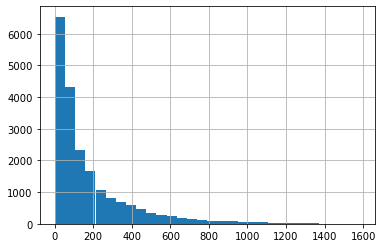

In [11]:
print(data['days_exposition'].isnull().sum())

data['days_exposition'].hist(bins=30)
days_exposition_median = data['days_exposition'].median()

data['days_exposition'] = data['days_exposition'].fillna(days_exposition_median)
print(data['days_exposition'].isnull().sum())

Т.к. пропуски в days_exposition составляют примерно 13.5%, эти данные нельзя удалить, но т.к. данные представлены распределение пуасона пропуски можно заполнить медианным значением не испортив дальнейший анализ. Такие пропуски могут быть из-за неверного импорта данных из источника или проблемы в самом источнике.

### Обработка пропусков в остальных столбцах не требуется, так они не участвуют в последующем анализе данных.

### Изменение типов данных

В процессе заполнения пропусков, некотрые поля сами изменили свой тип данных, например is_apartament, для дальнейшей работы достаточно преобразовать first_day_exposition в тип datetime. Где то можно перевести данные из float64 в int64, но особого эффекта на рассчёты или занимаемой памяти это не повлияет.

In [12]:
data.info()
data['first_day_exposition_date'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

### Шаг 3. Посчитайте и добавьте в таблицу

In [13]:
print('Расчёт цены за кв.м.:')
data['price_per_meter'] = data['last_price'] / data['total_area']
print(data.head())

Расчёт цены за кв.м.:
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.0  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0           2.700          16.0         51.0      8         False  ...   
1           2.615          11.0         19.0      1         False  ...   
2           2.700           5.0         34.0      4         False  ...   
3           2.700          14.0         90.0      9         False  ...   
4           3.030          14.0         32.0     13         False  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0       

In [14]:
print('Добавление дня недели, месяца и года публикации объявления')
data['day_of_week'] = pd.DatetimeIndex(data['first_day_exposition_date']).dayofweek
data['month'] = pd.DatetimeIndex(data['first_day_exposition_date']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition_date']).year
print(data.head())

Добавление дня недели, месяца и года публикации объявления
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.0  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0           2.700          16.0         51.0      8         False  ...   
1           2.615          11.0         19.0      1         False  ...   
2           2.700           5.0         34.0      4         False  ...   
3           2.700          14.0         90.0      9         False  ...   
4           3.030          14.0         32.0     13         False  ...   

   ponds_around3000  ponds_nearest  days_exposition  living_area_part

In [15]:
print('Добавление дня недели, месяца и года публикации объявления')

def set_floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

data['floor_type'] = data.apply(set_floor_type, axis=1)

print(data.head())

Добавление дня недели, месяца и года публикации объявления
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.0  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0           2.700          16.0         51.0      8         False  ...   
1           2.615          11.0         19.0      1         False  ...   
2           2.700           5.0         34.0      4         False  ...   
3           2.700          14.0         90.0      9         False  ...   
4           3.030          14.0         32.0     13         False  ...   

   ponds_nearest  days_exposition  living_area_part  kitchen_area_par

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Гистограмма площади

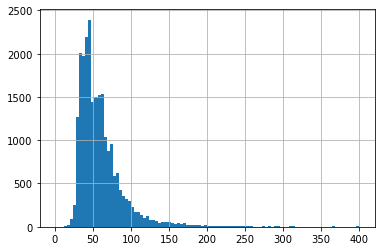

count    23565.000000
mean        60.315595
std         35.660572
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,first_day_exposition_date,price_per_meter,day_of_week,month,year,floor_type
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,False,...,366.0,62.0,0.577287,0.172414,2017-07-07,302839.116719,4,7,2017,последний
464,15,66571000.0,280.0,2015-06-11T00:00:00,6,5.20,8.0,160.0,7,False,...,616.0,578.0,0.571429,0.075000,2015-06-11,237753.571429,3,6,2015,другой
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.90,7.0,207.0,7,False,...,58.0,95.0,0.568042,0.172414,2019-03-18,178082.191781,0,3,2019,последний
660,3,49950000.0,484.0,2017-10-04T00:00:00,7,3.20,6.0,312.0,4,False,...,22.0,391.0,0.644628,0.053719,2017-10-04,103202.479339,2,10,2017,другой
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,False,...,190.0,342.0,0.806452,0.161290,2018-05-22,435483.870968,1,5,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22238,12,19500000.0,288.0,2017-12-27T00:00:00,7,2.70,4.0,184.0,3,False,...,853.0,90.0,0.638889,0.090278,2017-12-27,67708.333333,2,12,2017,другой
22345,8,53250000.0,290.0,2017-09-25T00:00:00,6,2.90,7.0,180.0,6,False,...,NaN,134.0,0.620690,0.062069,2017-09-25,183620.689655,0,9,2017,другой
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,False,...,NaN,115.0,0.558045,0.091650,2017-05-27,185488.798371,5,5,2017,последний
22835,20,29000000.0,275.0,2018-07-27T00:00:00,5,2.70,17.0,180.0,17,False,...,502.0,91.0,0.654545,0.061818,2018-07-27,105454.545455,4,7,2018,последний


In [16]:
data['total_area'].hist(bins=100, range=(0,400))
plt.show()
print(data['total_area'].describe())
data.query('total_area > 260')

Вывод: судя по гистограмме данные достаточно правдоподобны, ведь общая площадь большинства квартир находиться в диапозоне 40-70 кв.м. Но есть и артефактные значения которые выходят за 260 кв.м., которые можно отбросить

#### Гистограмма цены

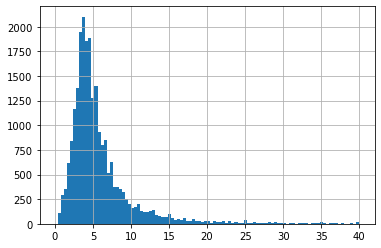

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_millions, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,living_area_part,kitchen_area_part,first_day_exposition_date,price_per_meter,day_of_week,month,year,floor_type,last_price_millions
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,90.0,9,False,...,424.0,0.568042,0.172414,2015-07-24,4.081761e+05,4,7,2015,другой,64.9000
51,7,45000000.0,161.0,2017-10-17T00:00:00,3,3.20,8.0,38.0,4,False,...,541.0,0.236025,0.310559,2017-10-17,2.795031e+05,1,10,2017,другой,45.0000
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.50,3.0,183.0,3,False,...,62.0,0.577287,0.172414,2017-07-07,3.028391e+05,4,7,2017,последний,96.0000
411,1,40662000.0,151.0,2014-12-09T00:00:00,3,2.70,8.0,85.0,3,False,...,594.0,0.562914,0.152318,2014-12-09,2.692848e+05,1,12,2014,другой,40.6620
464,15,66571000.0,280.0,2015-06-11T00:00:00,6,5.20,8.0,160.0,7,False,...,578.0,0.571429,0.075000,2015-06-11,2.377536e+05,3,6,2015,другой,66.5710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,20,59000000.0,128.0,2016-12-21T00:00:00,4,3.00,12.0,85.0,8,False,...,635.0,0.664062,0.101562,2016-12-21,4.609375e+05,2,12,2016,другой,59.0000
22804,4,81960000.0,205.0,2017-09-29T00:00:00,4,3.20,9.0,108.0,3,False,...,169.0,0.526829,0.048780,2017-09-29,3.998049e+05,4,9,2017,другой,81.9600
22831,18,289238400.0,188.0,2019-03-19T00:00:00,2,3.37,6.0,64.0,6,False,...,95.0,0.340426,0.159574,2019-03-19,1.538502e+06,1,3,2019,последний,289.2384
22907,9,65000000.0,228.0,2016-06-02T00:00:00,4,2.70,5.0,200.0,2,False,...,95.0,0.877193,0.172414,2016-06-02,2.850877e+05,3,6,2016,другой,65.0000


In [17]:
data['last_price_millions'] = data['last_price'] / 1000000
data['last_price_millions'].hist(bins = 100, range=(0, 40))
plt.show()
print(data['last_price_millions'].describe())
data.query('last_price_millions > 40')

Вывод: судя по гистограмме данные достаточно правдоподобны, сумма большинства квартир находиться в диапозоне 3-10 миллионов. Но есть и артефактные значения которые выходят за 40 млн., которые можно отбросить

#### Гистограмма числа комнат

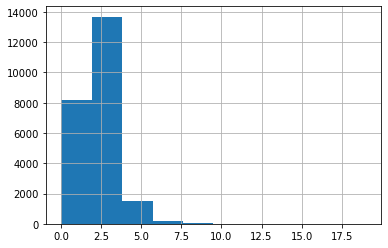

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,living_area_part,kitchen_area_part,first_day_exposition_date,price_per_meter,day_of_week,month,year,floor_type,last_price_millions
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,2.700,24.0,16.0,2,False,...,181.0,0.592593,0.172414,2017-03-30,90740.740741,3,3,2017,другой,2.450
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,2.750,14.0,17.0,1,False,...,45.0,0.680000,0.172414,2017-09-27,92800.000000,2,9,2017,первый,2.320
440,8,2480000.0,27.0,2018-03-12T00:00:00,0,2.700,17.0,25.0,4,False,...,64.0,0.925926,0.172414,2018-03-12,91851.851852,0,3,2018,другой,2.480
508,0,3375000.0,34.0,2017-03-28T00:00:00,0,2.640,26.0,24.0,19,False,...,430.0,0.705882,0.172414,2017-03-28,99264.705882,1,3,2017,другой,3.375
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,2.615,10.0,14.0,7,False,...,29.0,0.568042,0.172414,2019-02-20,74000.000000,2,2,2019,другой,1.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.0,2017-09-01T00:00:00,0,2.700,25.0,18.0,16,False,...,14.0,0.692308,0.172414,2017-09-01,123076.923077,4,9,2017,другой,3.200
23442,0,2500000.0,28.0,2017-09-28T00:00:00,0,2.700,24.0,18.0,4,False,...,4.0,0.642857,0.172414,2017-09-28,89285.714286,3,9,2017,другой,2.500
23554,15,3350000.0,26.0,2018-09-07T00:00:00,0,2.700,19.0,15.0,8,False,...,31.0,0.568042,0.172414,2018-09-07,128846.153846,4,9,2018,другой,3.350
23592,10,1450000.0,29.0,2017-11-11T00:00:00,0,2.560,9.0,18.0,8,False,...,82.0,0.620690,0.172414,2017-11-11,50000.000000,5,11,2017,другой,1.450


In [18]:
data['rooms'].hist()
plt.show()
print(data['rooms'].describe())
data.query('rooms > 7 or rooms < 1')

Вывод: судя по гистограмме данные достаточно правдоподобны, редко встречются квартиры с количеством комнат > 3. Но есть и артефактные значения которые выходят за 7 комнат, которые можно отбросить, а так же 0-ые значения.

#### Гистограмма высоты потолков

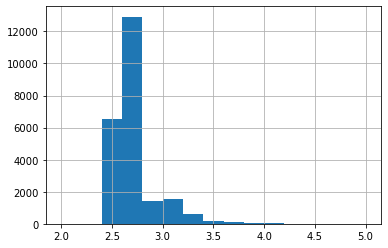

count    23565.000000
mean         2.706670
std          0.286701
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64


13.85    3
8.00     3
5.30     2
5.80     1
8.30     1
5.60     1
1.20     1
10.30    1
5.20     1
10.00    1
1.00     1
6.00     1
1.75     1
14.00    1
5.50     1
Name: ceiling_height, dtype: int64

In [19]:
data['ceiling_height'].hist(bins=15,range=(2,5))
plt.show()
print(data['ceiling_height'].describe())
data.query('ceiling_height < 2 or ceiling_height > 5')['ceiling_height'].value_counts()

Вывод: судя по гистограмме данные достаточно правдоподобны, редко встречются квартиры с выстой потолков больше 2.75 и меньше 2.4. Но есть и артефактные значения которые выходят за 5м, которые можно отбросить, а так же занчения меньше 2.5, что является минимальным значением по регламентам.

#### Анализ времени продажи квартиры

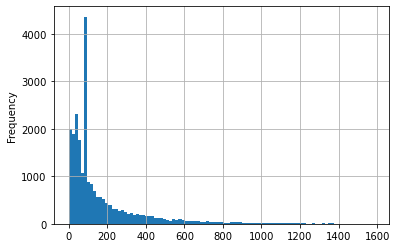

Среднее время продажи: 169.2036919159771
Медианное время продажи: 95.0


count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [20]:
data['days_exposition'].plot(bins=100, kind='hist', grid=True)
plt.show()
print('Среднее время продажи:', data['days_exposition'].mean())
print('Медианное время продажи:', data['days_exposition'].median())

data['days_exposition'].describe()

Вывод: время продажи квартиры обычно занимает 95 дней, по отличию среднего от медианного и гистограмме мы видим, что встречаются случаи когда квартиры продаются очень долго. Примерно на 600 днях график начинает сильно падать, поэтому всё что после 600 дней, можно считать очень долгой продажей, а очень быстрой 45, при этом значении пик графика распределения быстрых продаж меньше 50%. 

#### Чистка от редко встречающихся значений

In [21]:
good_data = data.query('total_area < 260 and last_price_millions < 40 and 1 < rooms < 7  and 2 < ceiling_height < 5')
good_data.sample(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,living_area_part,kitchen_area_part,first_day_exposition_date,price_per_meter,day_of_week,month,year,floor_type,last_price_millions
8421,1,3250000.0,48.0,2017-01-07T00:00:00,2,2.60,10.0,29.0,5,False,...,42.0,0.604167,0.166667,2017-01-07,67708.333333,5,1,2017,другой,3.250000
1856,15,2350000.0,48.0,2019-03-20T00:00:00,2,2.60,3.0,26.0,1,False,...,95.0,0.541667,0.145833,2019-03-20,48958.333333,2,3,2019,первый,2.350000
14377,20,3400000.0,73.0,2019-03-20T00:00:00,3,2.60,5.0,43.0,3,False,...,95.0,0.589041,0.109589,2019-03-20,46575.342466,2,3,2019,другой,3.400000
6959,0,3800000.0,56.0,2015-05-06T00:00:00,3,2.55,5.0,41.0,5,False,...,743.0,0.732143,0.089286,2015-05-06,67857.142857,2,5,2015,последний,3.800000
15097,17,8700000.0,97.0,2017-06-20T00:00:00,2,2.60,5.0,44.0,5,False,...,80.0,0.453608,0.172414,2017-06-20,89690.721649,1,6,2017,последний,8.700000
1620,9,7500000.0,60.0,2017-11-27T00:00:00,2,2.70,10.0,29.0,5,False,...,20.0,0.483333,0.166667,2017-11-27,125000.000000,0,11,2017,другой,7.500000
21745,10,13900000.0,126.0,2018-07-30T00:00:00,4,2.85,4.0,67.0,2,False,...,60.0,0.531746,0.238095,2018-07-30,110317.460317,0,7,2018,другой,13.900000
22278,1,6025000.0,88.0,2015-05-25T00:00:00,3,2.75,24.0,51.0,8,False,...,791.0,0.579545,0.136364,2015-05-25,68465.909091,0,5,2015,другой,6.025000
320,2,12734000.0,97.0,2016-01-30T00:00:00,3,2.70,10.0,51.0,7,False,...,195.0,0.525773,0.185567,2016-01-30,131278.350515,5,1,2016,другой,12.734000
4768,0,13500000.0,115.0,2017-11-28T00:00:00,3,2.80,25.0,54.0,5,False,...,118.0,0.469565,0.191304,2017-11-28,117391.304348,1,11,2017,другой,13.500000


На основе гистограмм построенных ранее мы смогли очистить данные от редких и выбивающихся значений. 
А именно, общая площадь квартиры не больше 260 кв.м, стоимость меньше 40 млн., комнат от 1 и до 7 и высота потолков от 2 до 5 метров.

#### Факторы влияющие на стоимость квартиры

In [22]:
price_corr = good_data[['last_price_millions', 'total_area', 'rooms', 'cityCenters_nearest']]
price_corr.corr()

,last_price_millions,total_area,rooms,cityCenters_nearest
last_price_millions,1.000000,0.771578,0.399506,-0.339125
total_area,0.771578,1.000000,0.683810,-0.228767
rooms,0.399506,0.683810,1.000000,-0.149095
cityCenters_nearest,-0.339125,-0.228767,-0.149095,1.000000


Как и ожидалось корреляциия цены и площади наиболее сильная чем все остальные, так же видна корреляция положительная корреляция между ценой и количеством комнат и отрицательная корреляция между ценой и удаленности от центра.

In [23]:
good_data.pivot_table(index='floor_type', values='last_price_millions', aggfunc= 'mean')

,last_price_millions
floor_type,
другой,7.359338
первый,5.106720
последний,6.474946


Стоимость квартир на первом и последнем этаже дешевле, т.к. с ними чаще возникают проблемы, например, течет крыша или воры затопило подвал и первый этаж.

In [24]:
print('Объединение объявлений по дню недели:')
print(good_data.pivot_table(index='day_of_week', values='last_price_millions', aggfunc= 'mean'))
print('')
print('Объединение объявлений по месяцам:')
print(good_data.pivot_table(index='month', values='last_price_millions', aggfunc= 'mean'))
print('')
print('Объединение объявлений по годам:')
good_data_year_pivot = good_data.pivot_table(index='year', values='last_price_millions', aggfunc=['mean', 'count'])
good_data_year_pivot.columns = ['mean', 'count']
print(good_data_year_pivot)

Объединение объявлений по дню недели:
             last_price_millions
day_of_week                     
0                       6.912128
1                       6.878096
2                       7.071107
3                       7.099706
4                       6.836772
5                       6.599348
6                       6.759604

Объединение объявлений по месяцам:
       last_price_millions
month                     
1                 7.144658
2                 6.892904
3                 6.789409
4                 6.724913
5                 7.100772
6                 6.738264
7                 6.876958
8                 6.993174
9                 7.139758
10                6.825402
11                7.078536
12                6.887016

Объединение объявлений по годам:
           mean  count
year                  
2014  10.989331    101
2015   7.889191    827
2016   6.944961   1790
2017   6.837529   5159
2018   6.695060   5310
2019   7.100945   1886


Связи между днём или месяцем публикации объявления особой нет. А вот если смотреть на группировку по годам, то там виден большой скачок средней цены, это может быть связано как с недостаточным количеством данных, так и возможным кризисом, который повлиял на дальнейшую цену.

#### Анализ средней цены за квадратный метр в топ-10 пунктах по количеству объявлений

In [25]:
top_ten_locality_by_ad = good_data.pivot_table(index='locality_name',values='last_price_millions', aggfunc='count').sort_values(by='last_price_millions', ascending=False).head(10).index

for locality_name, locality_data in good_data.query('locality_name in @top_ten_locality_by_ad').groupby('locality_name'):
    print('{}, средняя цена {:.2f} млн.руб'.format(locality_name, locality_data['last_price_millions'].mean()))

Всеволожск, средняя цена 4.38 млн.руб
Выборг, средняя цена 3.68 млн.руб
Гатчина, средняя цена 3.89 млн.руб
Колпино, средняя цена 4.29 млн.руб
Петергоф, средняя цена 5.15 млн.руб
Пушкин, средняя цена 7.68 млн.руб
Санкт-Петербург, средняя цена 8.25 млн.руб
посёлок Мурино, средняя цена 4.88 млн.руб
посёлок Парголово, средняя цена 5.65 млн.руб
посёлок Шушары, средняя цена 4.77 млн.руб


Сгруппировав данные по количеству объявлений, мы выделили топ-10 городов, сделали по ним срез и выявили что самое дорогое жилье в Санкт-Петербурге, а самое дешёвое в Выборге.

#### Изучение зависимости цены от приближенности к центру в Санкт-Петербурге

In [26]:
spb_ads = good_data[(good_data['locality_name'] == 'Санкт-Петербург') & ~(np.isnan(good_data['cityCenters_nearest']))]
spb_ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10314 entries, 0 to 23697
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               10314 non-null  int64         
 1   last_price                 10314 non-null  float64       
 2   total_area                 10314 non-null  float64       
 3   first_day_exposition       10314 non-null  object        
 4   rooms                      10314 non-null  int64         
 5   ceiling_height             10314 non-null  float64       
 6   floors_total               10314 non-null  float64       
 7   living_area                10314 non-null  float64       
 8   floor                      10314 non-null  int64         
 9   is_apartment               10314 non-null  bool          
 10  studio                     10314 non-null  bool          
 11  open_plan                  10314 non-null  bool          
 12  kitc

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


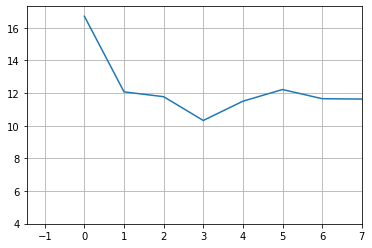

In [27]:
spb_ads['cityCenters_nearest_km'] = (spb_ads['cityCenters_nearest'] / 1000).round()
spb_ads_cityCenters_nearest_pivot = spb_ads.pivot_table(index='cityCenters_nearest_km', values='last_price_millions')

plt.plot(spb_ads_cityCenters_nearest_pivot.index, spb_ads_cityCenters_nearest_pivot.values)
plt.xlim(right=7)
plt.grid()
plt.show()

Из построенного графика мы видим что перепад происходит в точке 3км. Соответственно радиус находиться в радиусе 3 км.

#### Анализ квартир в центре Санкт-Петербурге

In [28]:
spb_ads_in_center = spb_ads.query('cityCenters_nearest_km <= 3')
spb_ads_in_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,living_area_part,kitchen_area_part,price_per_meter,day_of_week,month,year,last_price_millions,cityCenters_nearest_km
count,725.000000,7.250000e+02,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,...,635.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,10.482759,1.135980e+07,91.903448,3.103448,3.045628,4.911724,56.609655,3.133793,14.324661,0.102069,...,356.595276,230.878621,0.611367,0.162357,125535.478022,2.626207,6.369655,2017.108966,11.359803,2.143448
std,6.284357,5.944172e+06,35.578744,1.065041,0.370332,1.125023,25.527813,1.420072,7.922747,0.379821,...,261.901223,264.111633,0.099181,0.078645,49313.517492,1.711071,3.543520,1.148138,5.944172,0.836892
min,0.000000,3.500000e+06,33.000000,2.000000,2.500000,2.000000,13.000000,1.000000,4.000000,0.000000,...,22.000000,3.000000,0.208333,0.053691,28881.578947,0.000000,1.000000,2014.000000,3.500000,0.000000
25%,6.000000,7.480000e+06,67.000000,2.000000,2.700000,4.000000,39.000000,2.000000,9.000000,0.000000,...,127.500000,82.000000,0.560606,0.112676,94736.842105,1.000000,3.000000,2016.000000,7.480000,2.000000
50%,10.000000,9.500000e+06,85.000000,3.000000,3.000000,5.000000,51.000000,3.000000,12.000000,0.000000,...,292.000000,98.000000,0.616279,0.146341,112765.957447,3.000000,6.000000,2017.000000,9.500000,2.000000
75%,15.000000,1.350000e+07,110.000000,4.000000,3.300000,6.000000,68.000000,4.000000,17.000000,0.000000,...,569.000000,307.000000,0.681159,0.176471,139805.825243,4.000000,10.000000,2018.000000,13.500000,3.000000
max,50.000000,3.999000e+07,256.000000,6.000000,4.800000,10.000000,200.000000,10.000000,56.000000,4.000000,...,1051.000000,1572.000000,0.887097,0.558140,588088.235294,6.000000,12.000000,2019.000000,39.990000,3.000000


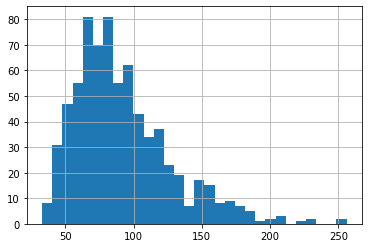

Сводка по площади квартир в центре Санкт-Петербурга:
count    725.000000
mean      91.903448
std       35.578744
min       33.000000
25%       67.000000
50%       85.000000
75%      110.000000
max      256.000000
Name: total_area, dtype: float64

Сводка по площади всех квартир в Санкт-Петербурге:
count    10314.000000
mean        72.882975
std         29.210962
min         20.000000
25%         53.000000
50%         65.000000
75%         84.000000
max        256.000000
Name: total_area, dtype: float64


In [29]:
spb_ads_in_center['total_area'].hist(bins=30)
plt.show()
print('Сводка по площади квартир в центре Санкт-Петербурга:')
print(spb_ads_in_center['total_area'].describe())
print()
print('Сводка по площади всех квартир в Санкт-Петербурге:')
print(spb_ads['total_area'].describe())

Исходя из графика и сводке по столбцу total_area мы видим, что медианное значение площади квартир в центре питера больше, относительней всего питера.

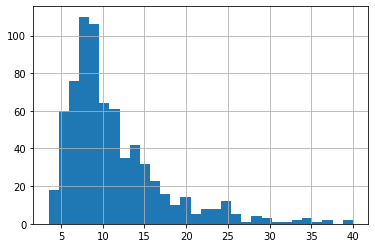

Сводка по цене квартир в центре Санкт-Петербурга:
count    725.000000
mean      11.359803
std        5.944172
min        3.500000
25%        7.480000
50%        9.500000
75%       13.500000
max       39.990000
Name: last_price_millions, dtype: float64

Сводка по цене всех квартир в Санкт-Петербурге:
count    10314.000000
mean         8.232682
std          5.215804
min          0.012190
25%          4.999000
50%          6.580000
75%          9.500000
max         39.990000
Name: last_price_millions, dtype: float64


In [30]:
spb_ads_in_center['last_price_millions'].hist(bins=30)
plt.show()
print('Сводка по цене квартир в центре Санкт-Петербурга:')
print(spb_ads_in_center['last_price_millions'].describe())
print()
print('Сводка по цене всех квартир в Санкт-Петербурге:')
print(spb_ads['last_price_millions'].describe())

Исходя из графика и сводке по столбцу last_price_millions мы видим, что медианное значение цены квартир в центре питера больше, относительней всего питера.

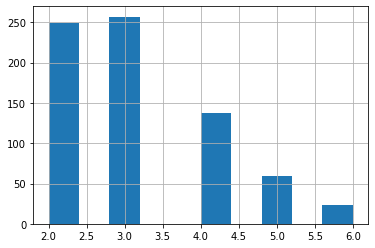

Сводка по количеству комнат в квартирах в центре Санкт-Петербурга:
count    725.000000
mean       3.103448
std        1.065041
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: rooms, dtype: float64

Сводка по количеству комнат во всех квартирах в Санкт-Петербурге:
count    10314.000000
mean         2.666667
std          0.789979
min          2.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


In [31]:
spb_ads_in_center['rooms'].hist()
plt.show()
print('Сводка по количеству комнат в квартирах в центре Санкт-Петербурга:')
print(spb_ads_in_center['rooms'].describe())
print()
print('Сводка по количеству комнат во всех квартирах в Санкт-Петербурге:')
print(spb_ads['rooms'].describe())

Исходя из графика и сводке по столбцу rooms мы видим, что медианное значение количества комнат в квартирах в центре питера больше, относительней всего питера.

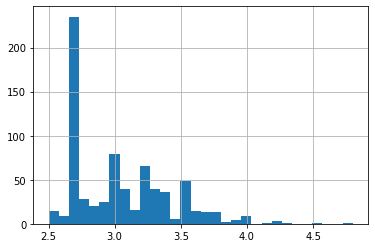

Сводка по вы высоте потолков в квартирах в центре Санкт-Петербурга:
count    725.000000
mean       3.045628
std        0.370332
min        2.500000
25%        2.700000
50%        3.000000
75%        3.300000
max        4.800000
Name: ceiling_height, dtype: float64

Сводка по вы высоте потолков во всех квартирах в Санкт-Петербурге:
count    10314.000000
mean         2.754327
std          0.251370
min          2.260000
25%          2.600000
50%          2.700000
75%          2.790000
max          4.800000
Name: ceiling_height, dtype: float64


In [32]:
spb_ads_in_center['ceiling_height'].hist(bins=30)
plt.show()
print('Сводка по вы высоте потолков в квартирах в центре Санкт-Петербурга:')
print(spb_ads_in_center['ceiling_height'].describe())
print()
print('Сводка по вы высоте потолков во всех квартирах в Санкт-Петербурге:')
print(spb_ads['ceiling_height'].describe())

Исходя из графика и сводке по столбцу ceiling_height мы видим, что медианное значение высоты потолков в квартирах в центре питера больше, относительней всего питера.

In [33]:
spb_ads_in_center[['last_price_millions', 'total_area', 'rooms', 'cityCenters_nearest_km']].corr()

,last_price_millions,total_area,rooms,cityCenters_nearest_km
last_price_millions,1.000000,0.624745,0.341540,-0.167277
total_area,0.624745,1.000000,0.745023,-0.053947
rooms,0.341540,0.745023,1.000000,-0.027519
cityCenters_nearest_km,-0.167277,-0.053947,-0.027519,1.000000


In [34]:
spb_ads[['last_price_millions', 'total_area', 'rooms', 'cityCenters_nearest_km']].corr()

,last_price_millions,total_area,rooms,cityCenters_nearest_km
last_price_millions,1.000000,0.786804,0.408515,-0.388055
total_area,0.786804,1.000000,0.690148,-0.322161
rooms,0.408515,0.690148,1.000000,-0.218364
cityCenters_nearest_km,-0.388055,-0.322161,-0.218364,1.000000


В обоих случаях связь между площадью и суммой, числом комнат и суммой примерно одинакова. Но можно заметить что связь удаленности от центра, гораздо сильнее для всего питера, чем для центральной части.

In [35]:
spb_ads_in_center.pivot_table(index='floor_type', values='last_price_millions', aggfunc= 'mean')

,last_price_millions
floor_type,
другой,11.993563
первый,9.238404
последний,10.891962


In [36]:
spb_ads.pivot_table(index='floor_type', values='last_price_millions', aggfunc= 'mean')


,last_price_millions
floor_type,
другой,8.468850
первый,6.385223
последний,8.435069


В обоих случаях видно, что разница в стоимости в зависимости от этажа в центре и во всем питере примерно одинакова. На первом этаже - дешевые, на последнем - самые дорогие.

In [37]:
print('Объединение объявлений по дню недели:')
print(spb_ads_in_center.pivot_table(index='day_of_week', values='last_price_millions', aggfunc= 'mean'))
print('')
print('Объединение объявлений по месяцам:')
print(spb_ads_in_center.pivot_table(index='month', values='last_price_millions', aggfunc= 'mean'))
print('')
print('Объединение объявлений по годам:')
spb_ads_in_center_year_pivot = spb_ads_in_center.pivot_table(index='year', values='last_price_millions', aggfunc=['mean', 'count'])
spb_ads_in_center_year_pivot.columns = ['mean', 'count']
print(spb_ads_in_center_year_pivot)

Объединение объявлений по дню недели:
             last_price_millions
day_of_week                     
0                      11.338354
1                      10.908358
2                      11.971523
3                      11.914686
4                      11.081082
5                       9.830809
6                      11.336128

Объединение объявлений по месяцам:
       last_price_millions
month                     
1                12.260549
2                11.143359
3                11.669243
4                10.852543
5                11.014452
6                12.042702
7                10.519661
8                11.732800
9                10.539114
10               11.843373
11               11.106474
12               12.323403

Объединение объявлений по годам:
           mean  count
year                  
2014  20.644639      4
2015  12.346213     80
2016  10.831564    101
2017  10.713189    265
2018  11.816210    198
2019  11.597257     77


In [38]:
print('Объединение объявлений по дню недели:')
print(spb_ads.pivot_table(index='day_of_week', values='last_price_millions', aggfunc= 'mean'))
print('')
print('Объединение объявлений по месяцам:')
print(spb_ads.pivot_table(index='month', values='last_price_millions', aggfunc= 'mean'))
print('')
print('Объединение объявлений по годам:')
spb_ads_year_pivot = spb_ads.pivot_table(index='year', values='last_price_millions', aggfunc=['mean', 'count'])
spb_ads_year_pivot.columns = ['mean', 'count']
print(spb_ads_year_pivot)

Объединение объявлений по дню недели:
             last_price_millions
day_of_week                     
0                       8.223828
1                       8.053253
2                       8.388561
3                       8.509176
4                       8.128380
5                       7.909676
6                       8.226014

Объединение объявлений по месяцам:
       last_price_millions
month                     
1                 8.717098
2                 8.254726
3                 8.173156
4                 7.913438
5                 8.265217
6                 8.155802
7                 7.998853
8                 8.274420
9                 8.445395
10                8.081176
11                8.389991
12                8.317395

Объединение объявлений по годам:
           mean  count
year                  
2014  13.334077     71
2015   9.057589    615
2016   8.181942   1241
2017   8.071282   3590
2018   8.129154   3470
2019   8.332251   1327


Связи между днём или месяцем публикации объявления особой нет. А вот если смотреть на группировку по годам, то там виден большой скачок средней цены, это может быть связано как с недостаточным количеством данных, так и возможным кризисом, который повлиял на дальнейшую цену. Как и при общем анализе.

### Шаг 5. Общий вывод

Проанализировав данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, я научился определять рыночную стоимость объектов недвижимости. А конкретно выделили параметры, которые наиболее влияют на стоимсть квартиры, это площадь и удаленность от центра. Так же мы установили, что среднее время продажи квартиры это 2 месяца. И люди продают самые разные квартиры, с невероятно высокими и низкими потолками, от 1 до 7 комнат и невероятные суммы - более 40 млн. А так же независимо от того в какой день или месяц вы выложите объявление, люди купят примерно за одинаковое время.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод